# COVID-19 Data Exploration

This Jupyter notebook looks at using an API from the [UK Government](https://coronavirus.data.gov.uk/details/developers-guide).

The purpose of this exercise is for myself to improve my data analysis and programming skills in Python.

Feel free to clone this repo if you want to take a look around! The requirements for running this notebook have been exported to the requirements.txt file.

More documentation for this library can be found [here](https://publichealthengland.github.io/coronavirus-dashboard-api-python-sdk/index.html)

In [20]:
from uk_covid19 import Cov19API
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [18]:
england_only = [
    'areaType=ltla',
    'areaName=Milton Keynes'
]

cases_and_deaths = {
    "date": "date",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate"
}

api = Cov19API(filters=england_only, structure=cases_and_deaths)
df = api.get_dataframe()

print(df.head())

         date  newCasesByPublishDate  cumCasesByPublishDate  \
0  2021-07-29                  130.0                25035.0   
1  2021-07-28                  135.0                    NaN   
2  2021-07-27                  100.0                    NaN   
3  2021-07-26                   90.0                    NaN   
4  2021-07-25                   98.0                    NaN   

   newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  
0                         NaN                         NaN  
1                         0.0                       467.0  
2                         0.0                       467.0  
3                         0.0                       467.0  
4                         0.0                       467.0  


<AxesSubplot:xlabel='Date', ylabel='New cases'>

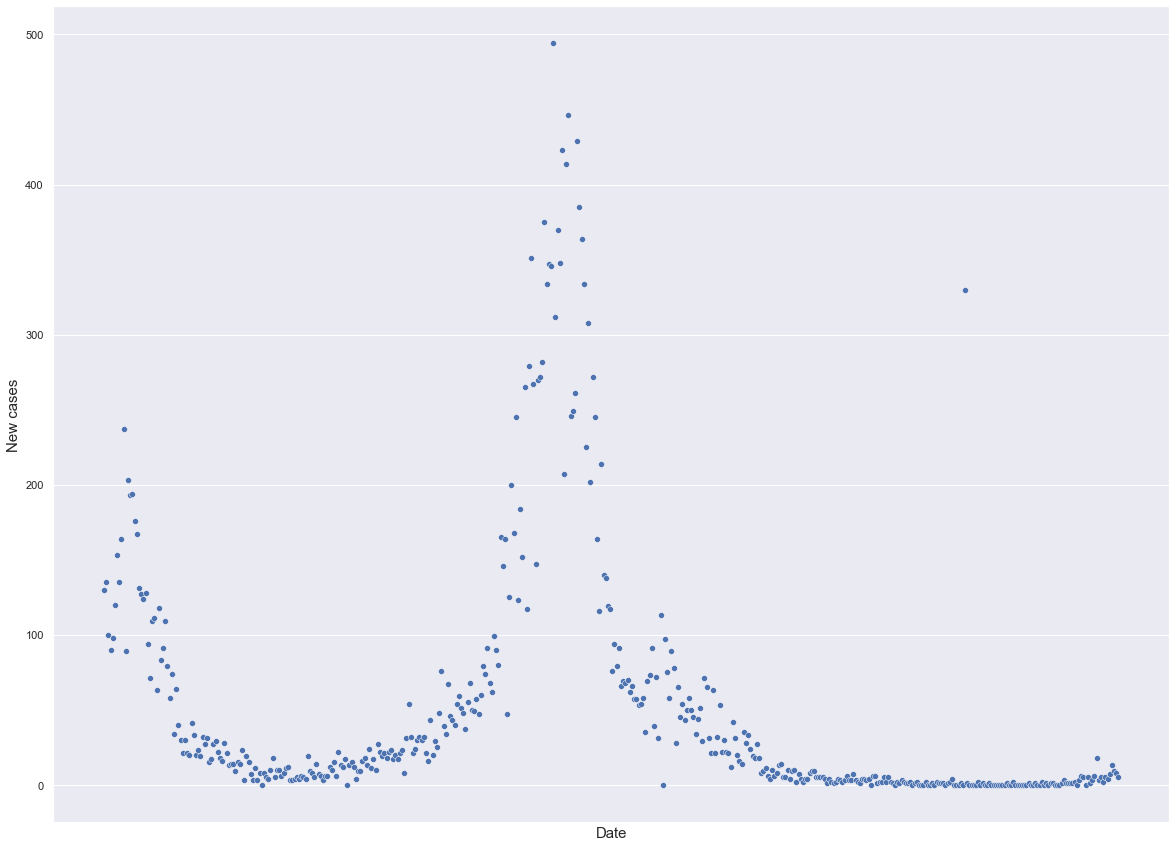

In [33]:
# create the plot
fig, ax = plt.subplots(figsize = (20,15))
# remove X Ticks
plt.xticks([])
# rename X and Y label
plt.xlabel('Date', fontsize=15)
plt.ylabel('New cases', fontsize=15)
# create plot
sns.scatterplot(x='date', y='newCasesByPublishDate', data=df)